###  Web-scraping IMDb with Python

###  Top popular movies

I used IMDb as a reference, because it contains all the information I need. On the website I selected the movies released between 01.01.-31.12.2021, sorted by popularity, and limited my search to the first page, so the top 50 movies.

In [1]:
from bs4 import BeautifulSoup
import requests

#  Very important: agree the User-Agent

header = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko)'}
url = 'https://www.imdb.com/search/title/?year=2021'

In [2]:
page = requests.get(url,headers = header)
soup = BeautifulSoup(page.content,"html.parser")

In [3]:
import pandas as pd
df = pd.DataFrame(columns=['Movie','Genre','Duration'],index = range(50))
#  Reset Index to Start from 1
import numpy as np
df.index = np.arange(1,len(df) +1)

## Extract

### This is the process of extracting data from various sources.

In [4]:
#  Loading the title info

titulo_data =soup.find_all('h3',attrs={'class':'lister-item-header'})
movies = []
for e in titulo_data:
    sub = e.find('a').text
    movies.append(sub)

df['Movie'] = movies

In [5]:
#  Genero
genero_data = soup.find_all('span',{'class':'genre'})
genero = []
for g in genero_data:
    
    string = g.text
    # Clean
    string1 = string.replace('\n','')
    string2 = string1.split(',')
    string3 = string2[0]
    genero.append(string3)

df['Genre'] = genero

In [6]:
#  Duracion
duracion_data = soup.find_all('span',{'class':'runtime'})
duration = []
for d in duracion_data:
    
    string = d.text
    string2 = string.replace('min','')
    duration.append(int(string2))

# Corrección por falta de datos en IMDB
duration.insert(16,0)
duration.insert(34,0)
df['Duration'] = duration

In [7]:
df.head()

,Movie,Genre,Duration
1,El teléfono negro,Horror,103
2,Only Murders in the Building,Comedy,30
3,American Horror Stories,Drama,45
4,Spider-Man: Sin camino a casa,Action,148
5,Sing 2: ¡Ven y canta de nuevo!,Animation,110


# Top movie genres
## Scraping the genre tags of each movie is pretty straightforward

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
grouped_genre = df.groupby('Genre').count()
grouped_genre = grouped_genre.drop(['Duration'],axis=1)

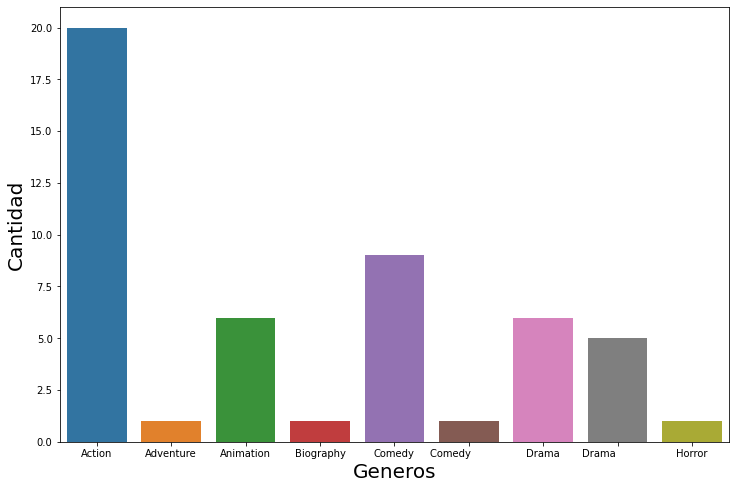

In [10]:
plt.figure(figsize=(12, 8)) 
plots = sns.barplot(x=grouped_genre.index, y=grouped_genre.Movie, data=grouped_genre) 
plt.xlabel("Generos", size=20) 
plt.ylabel("Cantidad", size=20) 
plt.show()

#  Top movies duration
##  Next, I analyzed the distribution of movie duration:

In [12]:
grouped_gen_dur = df.groupby(['Duration','Genre']).count()
df_gen = pd.DataFrame()
df_gen['Genre'] = df['Genre']
df_gen['Duration'] = df['Duration']

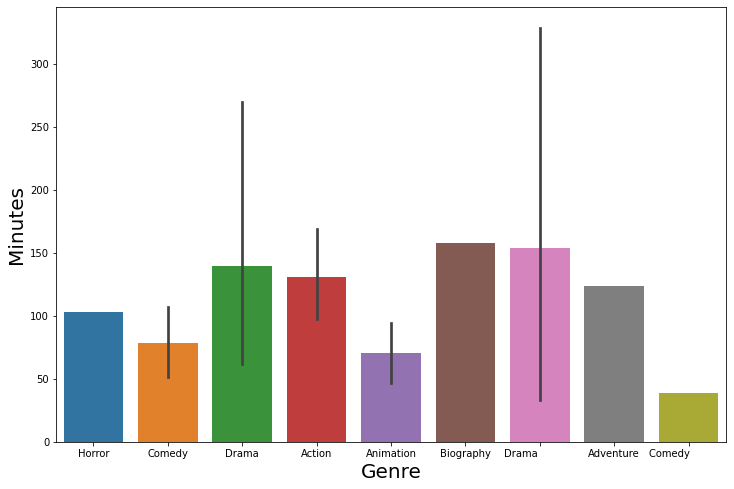

In [13]:
plt.figure(figsize=(12, 8)) 
plots = sns.barplot(x=df_gen.Genre, y=df_gen.Duration, data=df_gen) 
plt.xlabel("Genre", size=20) 
plt.ylabel("Minutes", size=20) 
plt.show() 

# Conclusion

Web scraping can provide a wealth of information, combined with analysis tools it can be very revealing.
In this project you can see how drama and biographical films are the longest running, while horror and animation films are the shortest running.